In [54]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
flightData = pd.read_csv("./HuntsvilleTeleMetrumRaw.csv")

In [106]:
verticalSpeed = (np.diff(flightData["height"]))/(np.diff(flightData["time"]))

<ipython-input-106-f880e75d1b5b>:1: RuntimeWarning: invalid value encountered in true_divide
  verticalSpeed = (np.diff(flightData["height"]))/(np.diff(flightData["time"]))


In [109]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [235]:
rho = 1.225 #kg/m^3
rocketDia = 0.1524 #m
rocketMass = 17 #kg
Apo = 2000 #m
burnOut = 257.78 #m
g = 9.81 #m/s^2


vCross = 10

Hconst = 10000

CdRocket = 0.5

def Cd(v):
    return CdRocket*(1-.1*(v/200))

def k(y,v):
    return 1/2*rho*np.exp(-y/Hconst)*np.pi/4*(rocketDia)**2*Cd(v)

def dVdy(y,v):
    return -k(y,v)/rocketMass*np.sqrt(v**2+vCross**2)*np.sign(v) - g/v

In [236]:
y_span = [burnOut, Apo-0.001]
vInitial = np.array([200.25]) #m/s
y_eval = np.arange(burnOut,Apo,2)

In [237]:
vCross = 0
CdRocket = 0.6
rocketMass = 15.5
solutionVert = spint.solve_ivp(dVdy,y_span,vInitial,t_eval=y_eval)

In [251]:
vCross = 100
CdRocket = 0.53
rocketMass = 15.5
solutionCross = spint.solve_ivp(dVdy,y_span,vInitial,t_eval=y_eval)

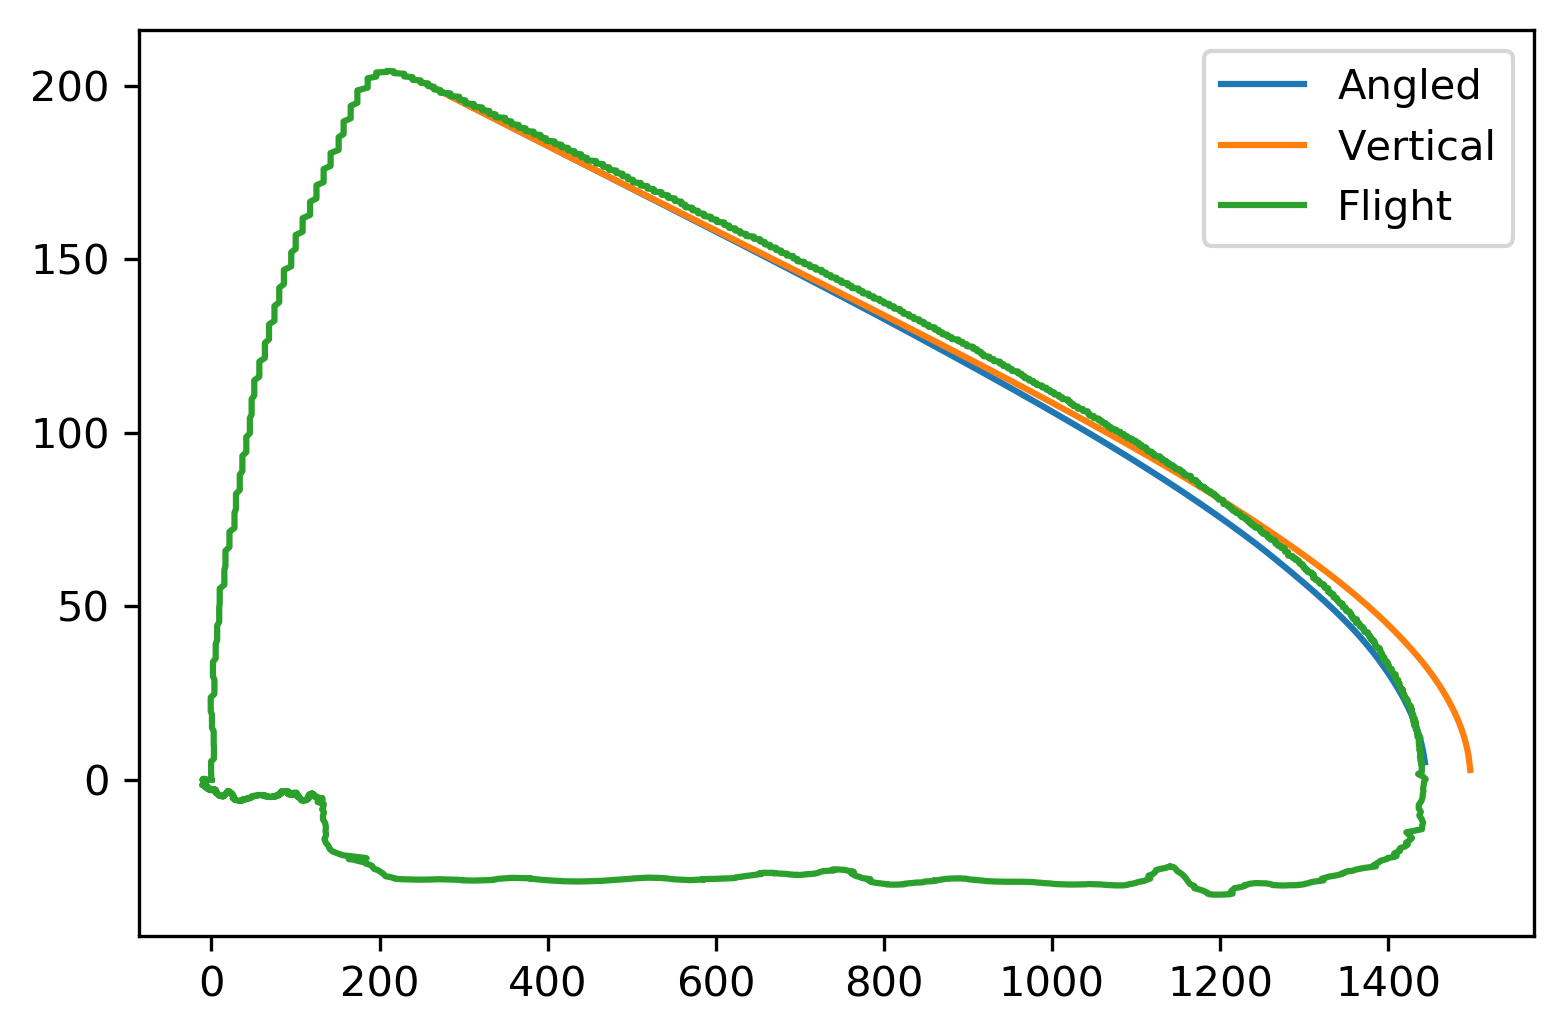

In [252]:
plt.figure(dpi=300)
plt.plot(solutionCross.t,solutionCross.y.T)
plt.plot(solutionVert.t,solutionVert.y.T)
plt.plot(flightData["height"],flightData["speed"])
plt.legend(["Angled","Vertical","Flight"])